<a href="https://colab.research.google.com/github/arbroni/GISMA-University-of-Applied-Sciences/blob/main/linear_regression_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## importing library 

import pandas as pd
import sklearn.model_selection
import sklearn.linear_model
import sklearn.metrics
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [3]:
## Loading the dataset

df=pd.read_csv("housing.csv")
df = df.set_index("id")
df.head()

,price,area,bedrooms,bathrooms,stories,stories.1,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
id,,,,,,,,,,,,,
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


In [4]:
## Spliting dataset into training

# x = df.drop(["price"]), axis=1

x = df["bedrooms"]
y = df["price"]
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y)

print("df:", df.shape)
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

#sklearn.model_selection.train_test_split()

df: (545, 13)
x_train: (408,)
x_test: (137,)
y_train: (408,)
y_test: (137,)


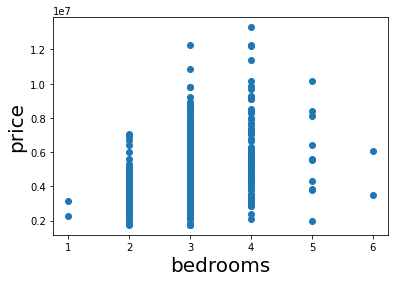

In [5]:
# Explore the data
plt.scatter(x,y)
plt.xlabel('bedrooms', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.show()

In [6]:
# Reshaping 
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(545, 1)

In [7]:
# Training the model

model = sklearn.linear_model.LinearRegression()
model.fit(x_matrix, y)

LinearRegression()

LinearRegression()

In [8]:
# Testing the model

y_predicted = model.predict(x_matrix)

In [9]:
# Regression

x = sm.add_constant(x)
results = sm.OLS(y,x).fit()
results.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     84.25
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           9.08e-19
Time:                        14:11:45   Log-Likelihood:                -8604.2
No. Observations:                 545   AIC:                         1.721e+04
Df Residuals:                     543   BIC:                         1.722e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.013e+06   3.09e+05      6.510      0.000    1.41e+06    2.62e+06
bedrooms    9.288e+05   1.01e+05      9.179      0.000     7.3e+05    1.13e+06
==============================================================================
Omnibus:                       91.744   Durbin-Watson:                   0.261
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.482
Skew:                           0.997   Prob(JB):                     5.22e-36
Kurtosis:                       4.784   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""